<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/GoogleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin

# Veri yolu
train_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Train'
validation_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Validation'
test_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Test'

# Parametreler
img_width, img_height = 224, 224
num_classes = 4  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Multiple Sclerosis'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.Adam(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories.append({
            'model': 'InceptionV3',
            'optimizer': 'Adam',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

# Eğitim geçmişlerini dosyaya kaydet
file_path = os.path.join(output_folder, 'inception_histories.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories, file)

# Eğitim geçmişlerini dosyadan yükle
with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

# Yüklenen eğitim geçmişlerini incele
for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    # İlgili eğitim geçmişi bilgilerini görselleştirme veya değerlendirme işlemleri yapabilirsiniz
    # Örneğin, accuracy ve loss grafiği çizimi, confusion matrix, classification report vb.
    print("--------------------")


87910968/87910968 [==============================] - 3s 0us/step
Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Epoch 1/15
37/37 [==============================] - 632s 17s/step - loss: 1.0156 - accuracy: 0.5325 - val_loss: 0.8380 - val_accuracy: 0.6146
Epoch 2/15
37/37 [==============================] - 26s 704ms/step - loss: 0.7174 - accuracy: 0.6755 - val_loss: 0.6129 - val_accuracy: 0.7396
Epoch 3/15
37/37 [==============================] - 26s 706ms/step - loss: 0.6200 - accuracy: 0.7149 - val_loss: 0.6093 - val_accuracy: 0.7031
Epoch 4/15
37/37 [==============================] - 27s 722ms/step - loss: 0.5772 - accuracy: 0.7397 - val_loss: 0.6281 - val_accuracy: 0.7161
Epoch 5/15
37/37 [==============================] - 26s 717ms/step - loss: 0.5877 - accuracy: 0.7158 - val_loss: 0.5190 - val_accuracy: 0.7552
Epoch 6/15
37/37 [==============================] - 26s 711ms/step - loss: 0.5549 - accuracy: 0.7414 - val_loss: 0.6044 - val_accuracy: 0.

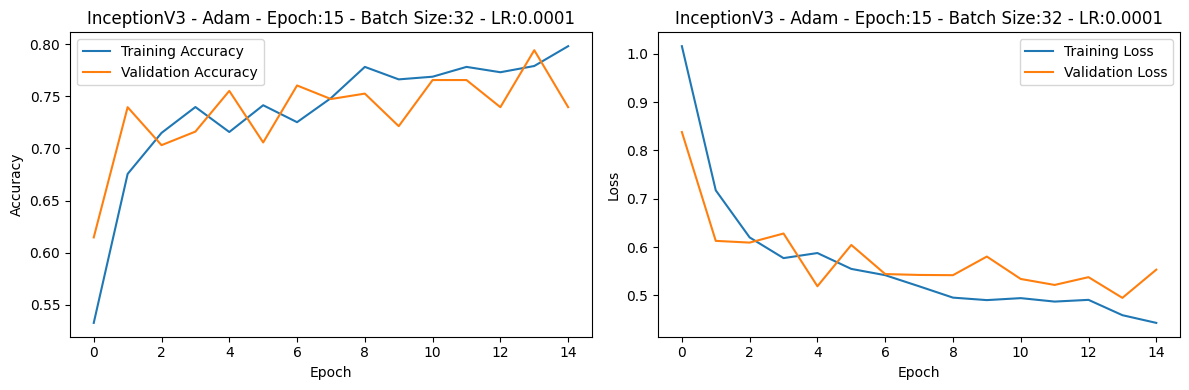

Found 400 images belonging to 4 classes.
13/13 [==============================] - 198s 16s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:32 - LR:0.0001:
[[79  0 16  1]
 [ 0 92  0  8]
 [38  0 68  0]
 [ 0 24  1 73]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.68      0.82      0.74        96
Control-Sagittal       0.79      0.92      0.85       100
        MS-Axial       0.80      0.64      0.71       106
     MS-Sagittal       0.89      0.74      0.81        98

        accuracy                           0.78       400
       macro avg       0.79      0.78      0.78       400
    weighted avg       0.79      0.78      0.78       400

--------------------


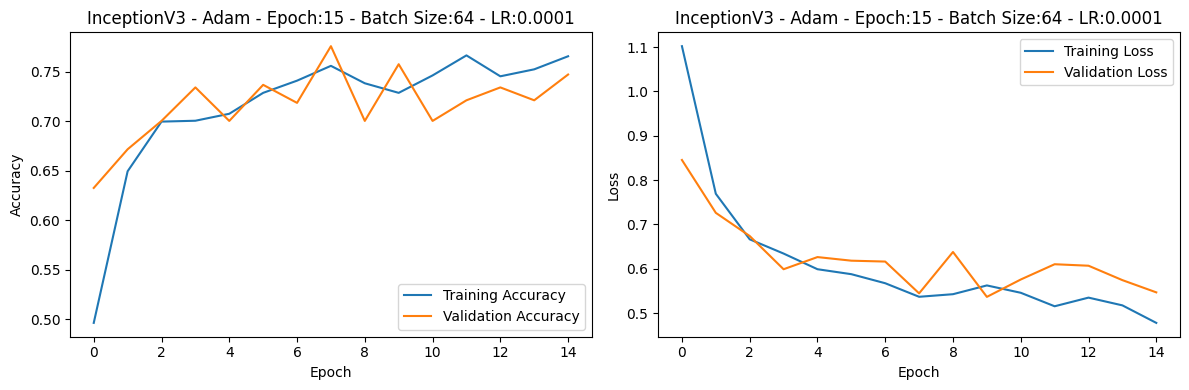

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 1s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:64 - LR:0.0001:
[[83  0 13  0]
 [ 0 88  0 12]
 [39  0 67  0]
 [ 0 29  1 68]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.68      0.86      0.76        96
Control-Sagittal       0.75      0.88      0.81       100
        MS-Axial       0.83      0.63      0.72       106
     MS-Sagittal       0.85      0.69      0.76        98

        accuracy                           0.77       400
       macro avg       0.78      0.77      0.76       400
    weighted avg       0.78      0.77      0.76       400

--------------------


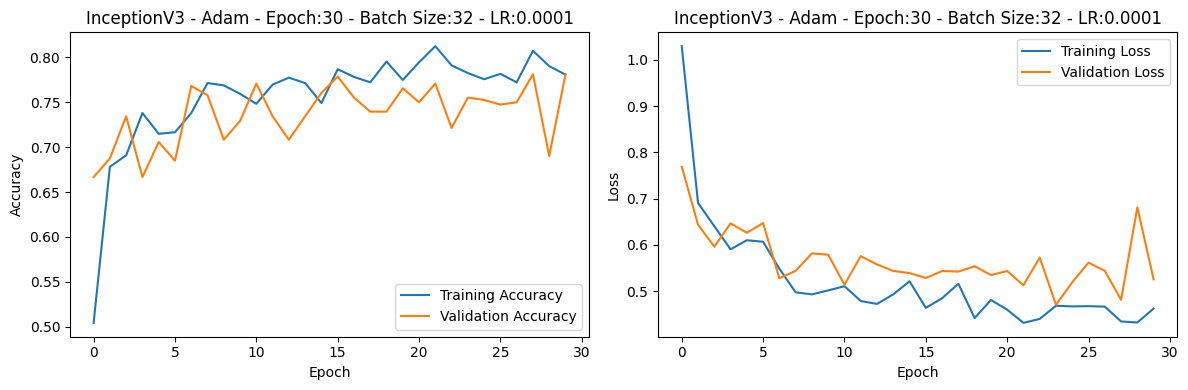

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 534ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:32 - LR:0.0001:
[[80  0 16  0]
 [ 0 85  0 15]
 [30  1 75  0]
 [ 1 21  1 75]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.72      0.83      0.77        96
Control-Sagittal       0.79      0.85      0.82       100
        MS-Axial       0.82      0.71      0.76       106
     MS-Sagittal       0.83      0.77      0.80        98

        accuracy                           0.79       400
       macro avg       0.79      0.79      0.79       400
    weighted avg       0.79      0.79      0.79       400

--------------------


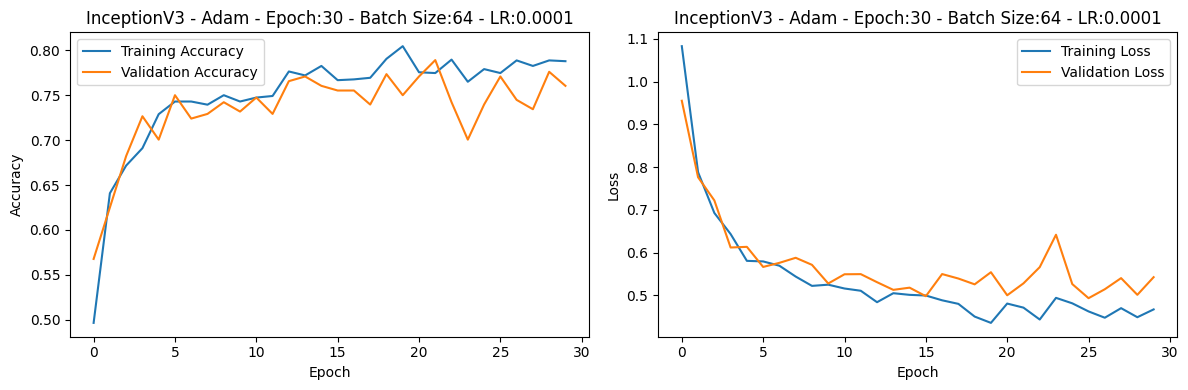

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 991ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:64 - LR:0.0001:
[[81  0 15  0]
 [ 1 85  0 14]
 [37  0 69  0]
 [ 0 25  1 72]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.68      0.84      0.75        96
Control-Sagittal       0.77      0.85      0.81       100
        MS-Axial       0.81      0.65      0.72       106
     MS-Sagittal       0.84      0.73      0.78        98

        accuracy                           0.77       400
       macro avg       0.78      0.77      0.77       400
    weighted avg       0.78      0.77      0.77       400

--------------------


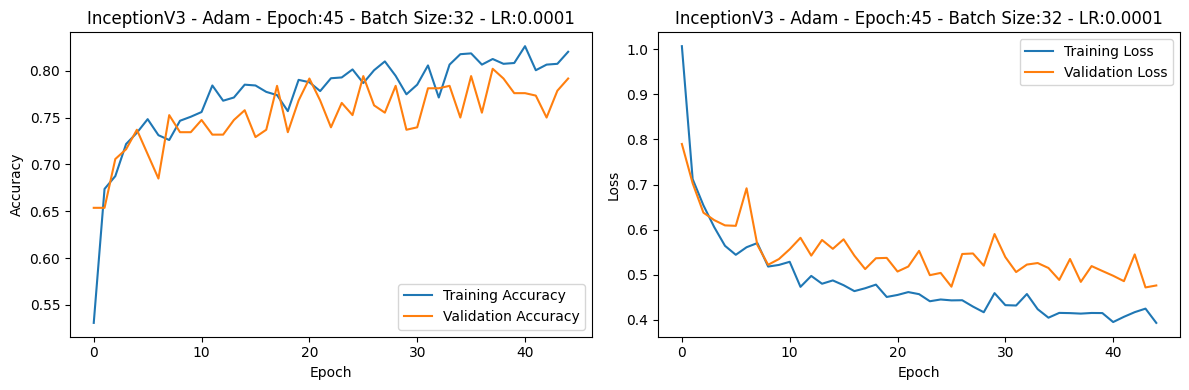

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 537ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:32 - LR:0.0001:
[[84  1 11  0]
 [ 0 88  0 12]
 [38  0 67  1]
 [ 1 30  0 67]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.68      0.88      0.77        96
Control-Sagittal       0.74      0.88      0.80       100
        MS-Axial       0.86      0.63      0.73       106
     MS-Sagittal       0.84      0.68      0.75        98

        accuracy                           0.77       400
       macro avg       0.78      0.77      0.76       400
    weighted avg       0.78      0.77      0.76       400

--------------------


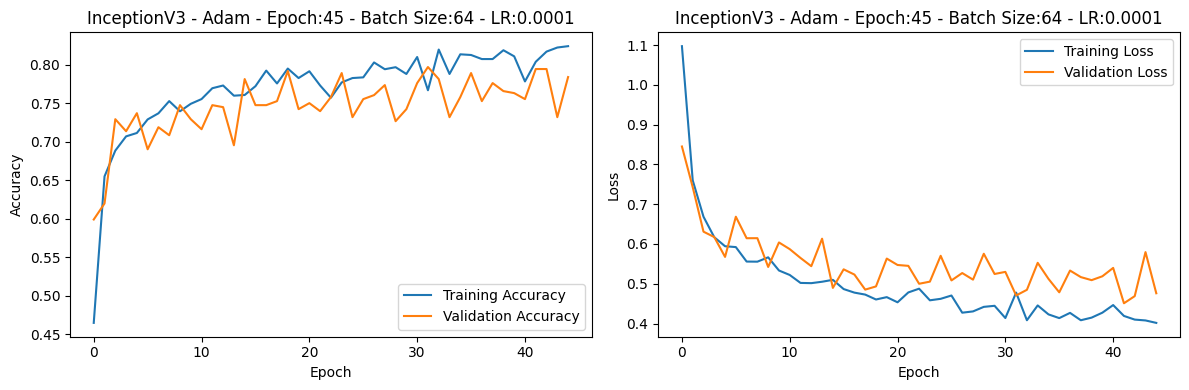

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 977ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:64 - LR:0.0001:
[[83  1 12  0]
 [ 0 83  0 17]
 [40  2 64  0]
 [ 0 31  1 66]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.67      0.86      0.76        96
Control-Sagittal       0.71      0.83      0.76       100
        MS-Axial       0.83      0.60      0.70       106
     MS-Sagittal       0.80      0.67      0.73        98

        accuracy                           0.74       400
       macro avg       0.75      0.74      0.74       400
    weighted avg       0.75      0.74      0.74       400

--------------------


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin

# Veri yolu
train_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Train'
validation_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Validation'
test_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Test'

# Parametreler
img_width, img_height = 224, 224
num_classes = 4  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories2 = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Multiple Sclerosis'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories2.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

# Eğitim geçmişlerini dosyaya kaydet
file_path = os.path.join(output_folder, 'inception_histories2.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories2, file)

# Eğitim geçmişlerini dosyadan yükle
with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

# Yüklenen eğitim geçmişlerini incele
for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    # İlgili eğitim geçmişi bilgilerini görselleştirme veya değerlendirme işlemleri yapabilirsiniz
    # Örneğin, accuracy ve loss grafiği çizimi, confusion matrix, classification report vb.
    print("--------------------")


Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Epoch 1/15
37/37 [==============================] - 33s 779ms/step - loss: 1.0930 - accuracy: 0.5146 - val_loss: 0.9799 - val_accuracy: 0.5026
Epoch 2/15
37/37 [==============================] - 27s 725ms/step - loss: 0.7882 - accuracy: 0.6481 - val_loss: 0.8105 - val_accuracy: 0.6302
Epoch 3/15
37/37 [==============================] - 27s 724ms/step - loss: 0.7095 - accuracy: 0.6652 - val_loss: 0.6920 - val_accuracy: 0.6979
Epoch 4/15
37/37 [==============================] - 27s 730ms/step - loss: 0.6299 - accuracy: 0.7269 - val_loss: 0.6023 - val_accuracy: 0.7240
Epoch 5/15
37/37 [==============================] - 27s 720ms/step - loss: 0.6610 - accuracy: 0.6961 - val_loss: 0.5755 - val_accuracy: 0.7292
Epoch 6/15
37/37 [==============================] - 27s 733ms/step - loss: 0.6059 - accuracy: 0.7175 - val_loss: 0.6081 - val_accuracy: 0.7188
Epoch 7/15
37/37 [==============================] - 27s 725

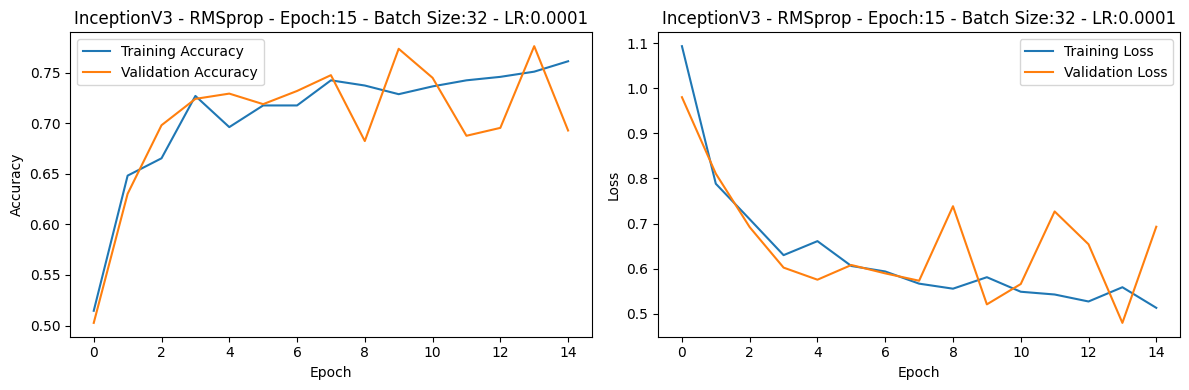

Found 400 images belonging to 4 classes.
13/13 [==============================] - 8s 510ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:32 - LR:0.0001:
[[76  0 20  0]
 [ 0 72  0 28]
 [23  1 82  0]
 [ 0 17  2 79]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.77      0.79      0.78        96
Control-Sagittal       0.80      0.72      0.76       100
        MS-Axial       0.79      0.77      0.78       106
     MS-Sagittal       0.74      0.81      0.77        98

        accuracy                           0.77       400
       macro avg       0.77      0.77      0.77       400
    weighted avg       0.77      0.77      0.77       400

--------------------


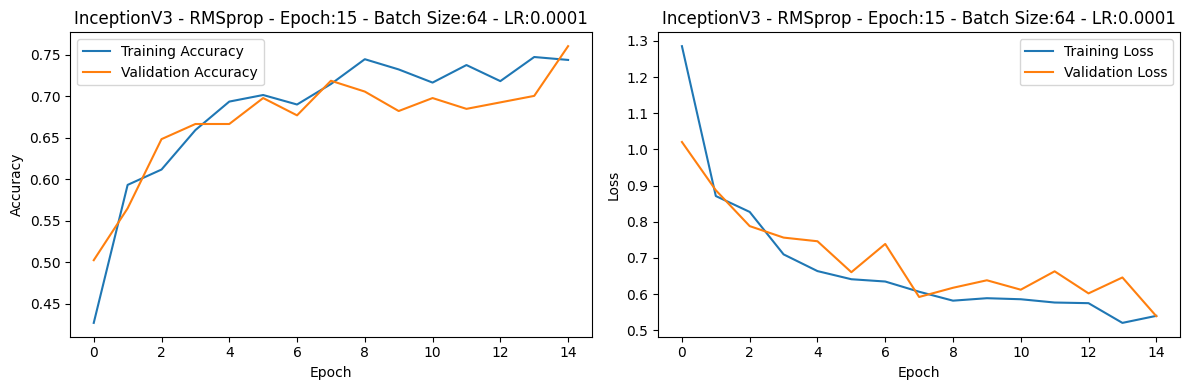

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 950ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:64 - LR:0.0001:
[[66  0 30  0]
 [ 0 72  0 28]
 [24  0 82  0]
 [ 0  9  1 88]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.73      0.69      0.71        96
Control-Sagittal       0.89      0.72      0.80       100
        MS-Axial       0.73      0.77      0.75       106
     MS-Sagittal       0.76      0.90      0.82        98

        accuracy                           0.77       400
       macro avg       0.78      0.77      0.77       400
    weighted avg       0.78      0.77      0.77       400

--------------------


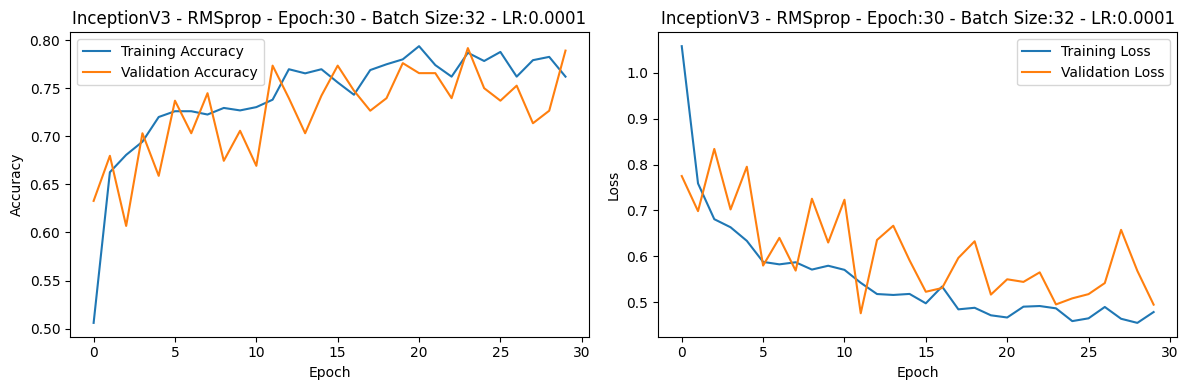

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 522ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:32 - LR:0.0001:
[[75  0 19  2]
 [ 0 72  0 28]
 [26  0 80  0]
 [ 0 12  2 84]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.74      0.78      0.76        96
Control-Sagittal       0.86      0.72      0.78       100
        MS-Axial       0.79      0.75      0.77       106
     MS-Sagittal       0.74      0.86      0.79        98

        accuracy                           0.78       400
       macro avg       0.78      0.78      0.78       400
    weighted avg       0.78      0.78      0.78       400

--------------------


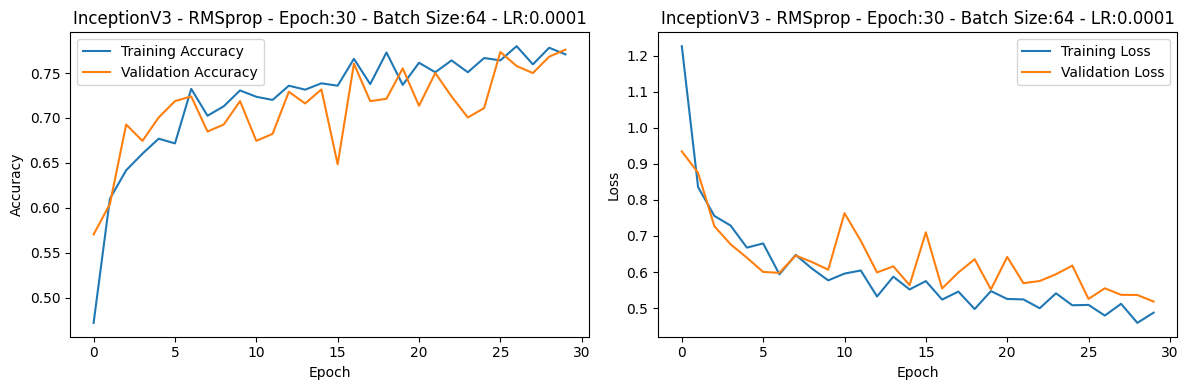

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 994ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:64 - LR:0.0001:
[[67  1 28  0]
 [ 0 79  0 21]
 [30  1 74  1]
 [ 1 17  1 79]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.68      0.70      0.69        96
Control-Sagittal       0.81      0.79      0.80       100
        MS-Axial       0.72      0.70      0.71       106
     MS-Sagittal       0.78      0.81      0.79        98

        accuracy                           0.75       400
       macro avg       0.75      0.75      0.75       400
    weighted avg       0.75      0.75      0.75       400

--------------------


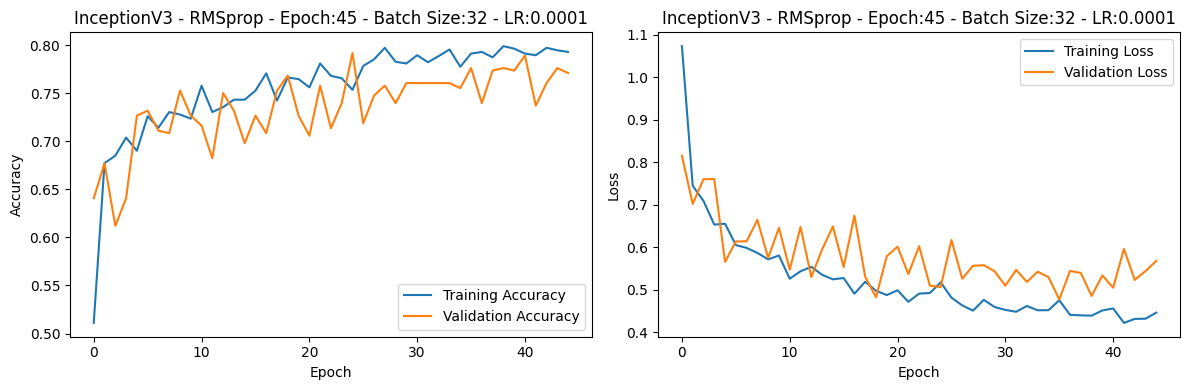

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 518ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:32 - LR:0.0001:
[[67  0 29  0]
 [ 0 68  1 31]
 [23  1 82  0]
 [ 0 15  1 82]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.74      0.70      0.72        96
Control-Sagittal       0.81      0.68      0.74       100
        MS-Axial       0.73      0.77      0.75       106
     MS-Sagittal       0.73      0.84      0.78        98

        accuracy                           0.75       400
       macro avg       0.75      0.75      0.75       400
    weighted avg       0.75      0.75      0.75       400

--------------------


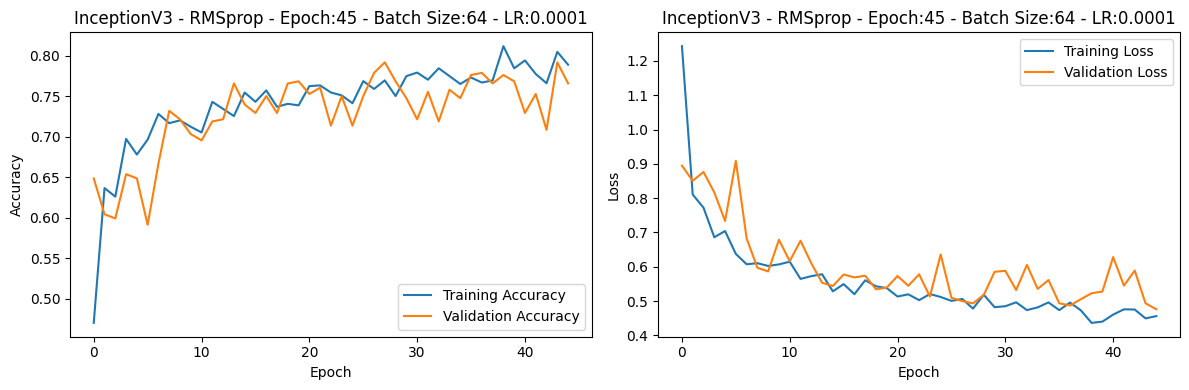

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 973ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:64 - LR:0.0001:
[[76  1 19  0]
 [ 2 72  0 26]
 [23  0 83  0]
 [ 0 14  1 83]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.75      0.79      0.77        96
Control-Sagittal       0.83      0.72      0.77       100
        MS-Axial       0.81      0.78      0.79       106
     MS-Sagittal       0.76      0.85      0.80        98

        accuracy                           0.79       400
       macro avg       0.79      0.79      0.78       400
    weighted avg       0.79      0.79      0.78       400

--------------------


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories2:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin

# Veri yolu
train_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Train'
validation_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Validation'
test_data_dir = '/content/drive/MyDrive/Multiple Sclerosis/Split/Test'


# Parametreler
img_width, img_height = 224, 224
num_classes = 4  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories3 = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Multiple Sclerosis'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.SGD(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories3.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

# Eğitim geçmişlerini dosyaya kaydet
file_path = os.path.join(output_folder, 'inception_histories3.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories3, file)

# Eğitim geçmişlerini dosyadan yükle
with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

# Yüklenen eğitim geçmişlerini incele
for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    # İlgili eğitim geçmişi bilgilerini görselleştirme veya değerlendirme işlemleri yapabilirsiniz
    # Örneğin, accuracy ve loss grafiği çizimi, confusion matrix, classification report vb.
    print("--------------------")

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Epoch 1/15
37/37 [==============================] - 32s 759ms/step - loss: 1.6083 - accuracy: 0.2680 - val_loss: 1.5738 - val_accuracy: 0.2656
Epoch 2/15
37/37 [==============================] - 27s 719ms/step - loss: 1.5124 - accuracy: 0.2363 - val_loss: 1.4680 - val_accuracy: 0.2865
Epoch 3/15
37/37 [==============================] - 27s 720ms/step - loss: 1.4395 - accuracy: 0.2663 - val_loss: 1.4348 - val_accuracy: 0.2708
Epoch 4/15
37/37 [==============================] - 27s 725ms/step - loss: 1.4069 - accuracy: 0.2979 - val_loss: 1.4069 - val_accuracy: 0.3125
Epoch 5/15
37/37 [==============================] - 26s 712ms/step - loss: 1.3722 - accuracy: 0.3048 - val_loss: 1.4174 - val_accuracy: 0.2734
Epoch 6/15
37/37 [==============================] - 26s 717ms/step - loss: 1.3499 - accuracy: 0.3476 - val_loss: 1.3617 - val_accuracy: 0.3385
Epoch 7/15
37/37 [==============================] - 26s 712

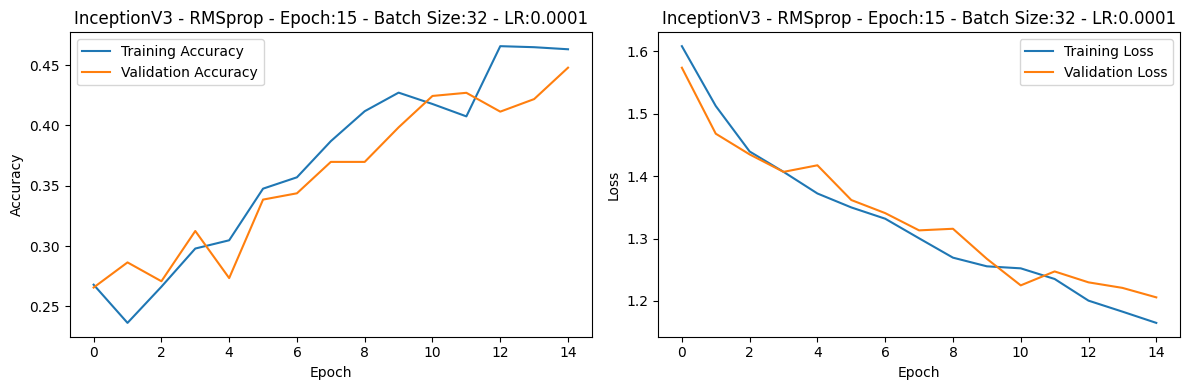

Found 400 images belonging to 4 classes.
13/13 [==============================] - 8s 538ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:32 - LR:0.0001:
[[39 11 36 10]
 [ 5 56  5 34]
 [38  4 58  6]
 [ 8 39  7 44]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.43      0.41      0.42        96
Control-Sagittal       0.51      0.56      0.53       100
        MS-Axial       0.55      0.55      0.55       106
     MS-Sagittal       0.47      0.45      0.46        98

        accuracy                           0.49       400
       macro avg       0.49      0.49      0.49       400
    weighted avg       0.49      0.49      0.49       400

--------------------


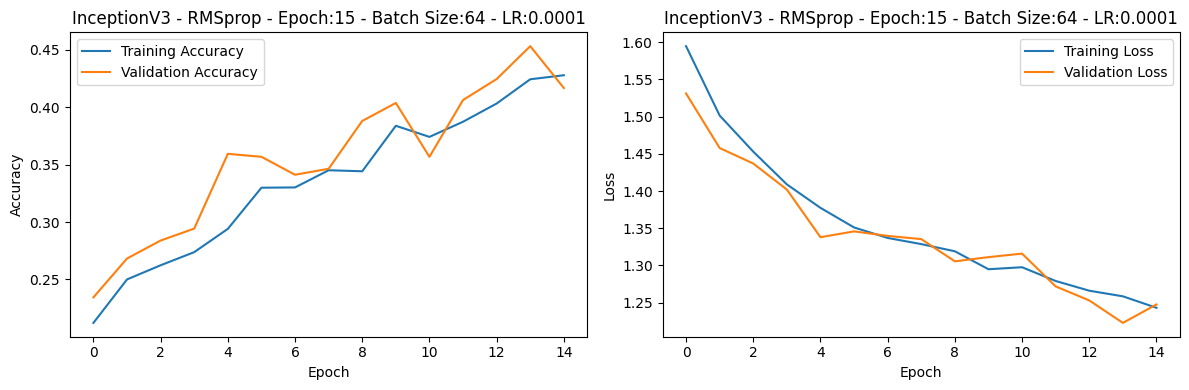

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:64 - LR:0.0001:
[[37  9 42  8]
 [ 7 52  9 32]
 [34  1 62  9]
 [ 5 37  5 51]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.45      0.39      0.41        96
Control-Sagittal       0.53      0.52      0.52       100
        MS-Axial       0.53      0.58      0.55       106
     MS-Sagittal       0.51      0.52      0.52        98

        accuracy                           0.51       400
       macro avg       0.50      0.50      0.50       400
    weighted avg       0.50      0.51      0.50       400

--------------------


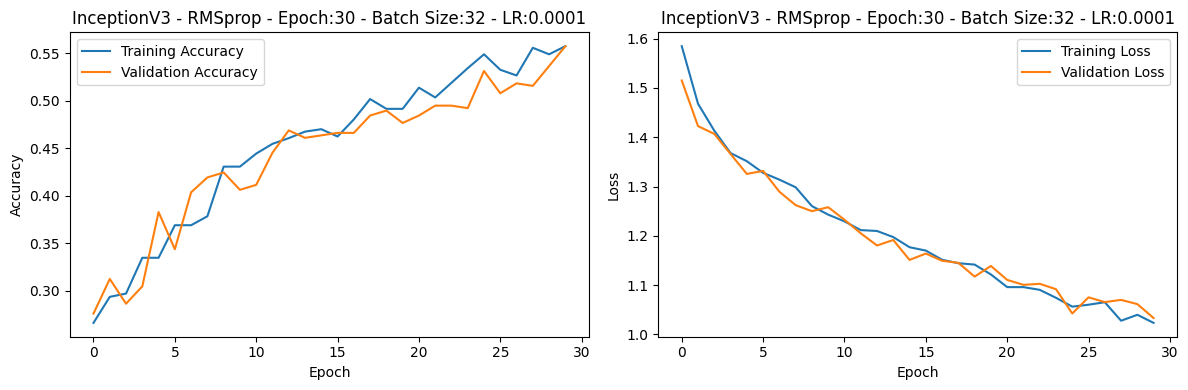

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 546ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:32 - LR:0.0001:
[[42  4 41  9]
 [ 6 57  8 29]
 [37  6 57  6]
 [ 4 37  9 48]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.47      0.44      0.45        96
Control-Sagittal       0.55      0.57      0.56       100
        MS-Axial       0.50      0.54      0.52       106
     MS-Sagittal       0.52      0.49      0.51        98

        accuracy                           0.51       400
       macro avg       0.51      0.51      0.51       400
    weighted avg       0.51      0.51      0.51       400

--------------------


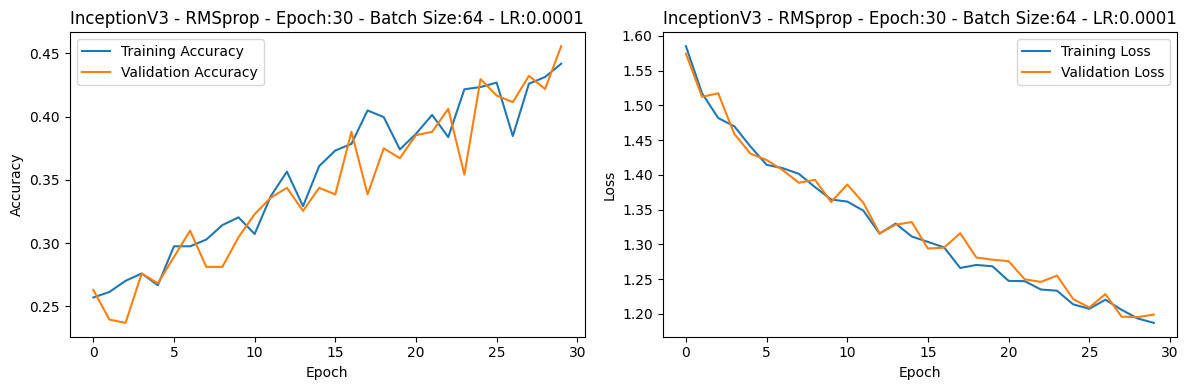

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:64 - LR:0.0001:
[[35  8 44  9]
 [ 9 47  8 36]
 [39  4 58  5]
 [ 6 29 11 52]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.39      0.36      0.38        96
Control-Sagittal       0.53      0.47      0.50       100
        MS-Axial       0.48      0.55      0.51       106
     MS-Sagittal       0.51      0.53      0.52        98

        accuracy                           0.48       400
       macro avg       0.48      0.48      0.48       400
    weighted avg       0.48      0.48      0.48       400

--------------------


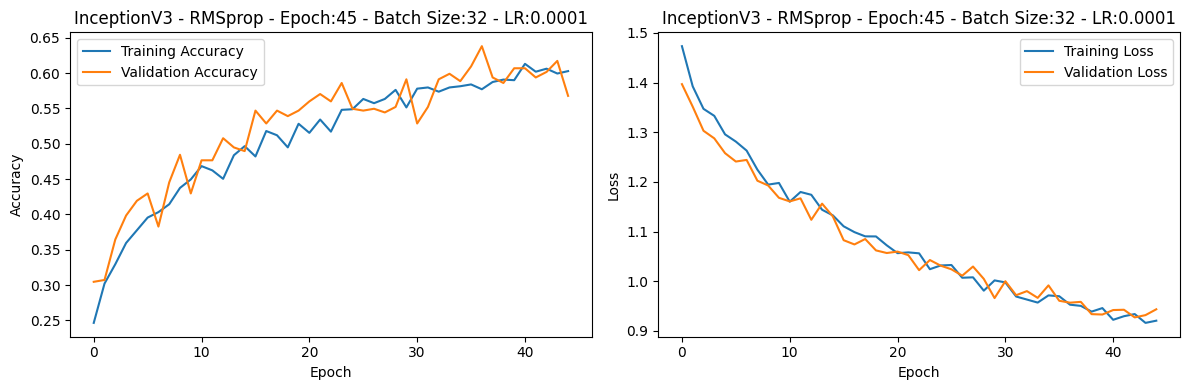

Found 400 images belonging to 4 classes.
13/13 [==============================] - 7s 540ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:32 - LR:0.0001:
[[38 10 37 11]
 [ 8 52  6 34]
 [33  1 58 14]
 [ 5 41  7 45]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.45      0.40      0.42        96
Control-Sagittal       0.50      0.52      0.51       100
        MS-Axial       0.54      0.55      0.54       106
     MS-Sagittal       0.43      0.46      0.45        98

        accuracy                           0.48       400
       macro avg       0.48      0.48      0.48       400
    weighted avg       0.48      0.48      0.48       400

--------------------


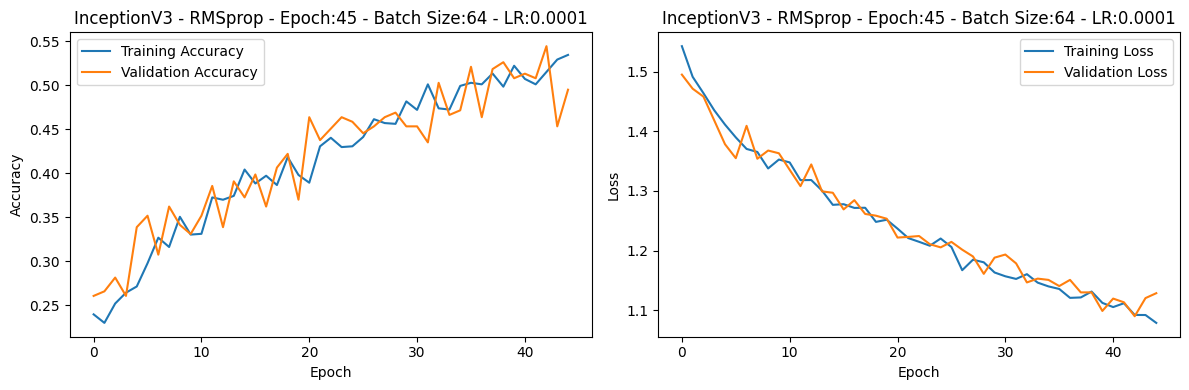

Found 400 images belonging to 4 classes.
7/7 [==============================] - 7s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:64 - LR:0.0001:
[[30  6 46 14]
 [ 7 55  7 31]
 [35  4 60  7]
 [ 5 37  9 47]]

Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.39      0.31      0.35        96
Control-Sagittal       0.54      0.55      0.54       100
        MS-Axial       0.49      0.57      0.53       106
     MS-Sagittal       0.47      0.48      0.48        98

        accuracy                           0.48       400
       macro avg       0.47      0.48      0.47       400
    weighted avg       0.47      0.48      0.48       400

--------------------


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories3:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')